## <p> A model will help us understand the exact relationship between different varibl and how these variables are used to predict  a result.</p>

The questions:
<li> Do I know if the deler is offering a fair value for my trade-in?</li>
<li> Do I know if I I put a fair value for my car?
    

<h4>Setup</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'automobileEDA.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3> Linear Regression</h3>

Simple Linear Regression is a method that help us understand the relationship between two variables.

<ul>
    <li> The predictor/indepentent variable X</li>
    <li> The response/dependent vqriable y </li>
</ul>

The result of Linear Regression is a liner function that predicts the Response 

Linear function:
    $$
    Yhat = a + bX
    $$

a - an intercept
b - a slope

<h4>Load a module for Linear Regression</h4>

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()  # create a linear regression object

In [6]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

<h4>How could Highway-mpg help us predict car price?</h4>


In [51]:
X = df[['highway-mpg']]
y = df['price']

Fit the linear model using "highway-mpg" feature.

In [8]:
lm.fit(X,y)

LinearRegression()

Output a prediction.

In [9]:
Yhat = lm.predict(X)
Yhat[0:10]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

In [10]:
lm.intercept_ # print the value of the intercept

38423.305858157386

In [11]:
lm.coef_  # print the value of the slope

array([-821.73337832])

<h3>Multiple Linear Regression</h3>


Predict car price using more that one variable.

This method explains us a relationship between one continuous respone (dependent) variable and two or more indepentent varibles.

The equation is given by:
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

a  -  a intercept
b1, b2 ... - coefficients 

The good predictors of car price could be:
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [12]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [13]:
lm.fit(Z,y)

LinearRegression()

In [14]:
lm.intercept_

-15806.624626329198

In [15]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

$$
Yhat = -15806.62 + 53.50*horsepower + 4.71*curb-weight + 81.53*engine-size + 36.06*highwy_mpg
$$

<h3>Model Evaluation using Visualization</h3>

In [16]:
import seaborn as sns
%matplotlib inline

<h3>Regression Plot</h3>

This Plot will show a combination of  scatterd data points ( scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of relationship between the two variables, the strength of correlation, as well the direction. 

 Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48173.781804828825)

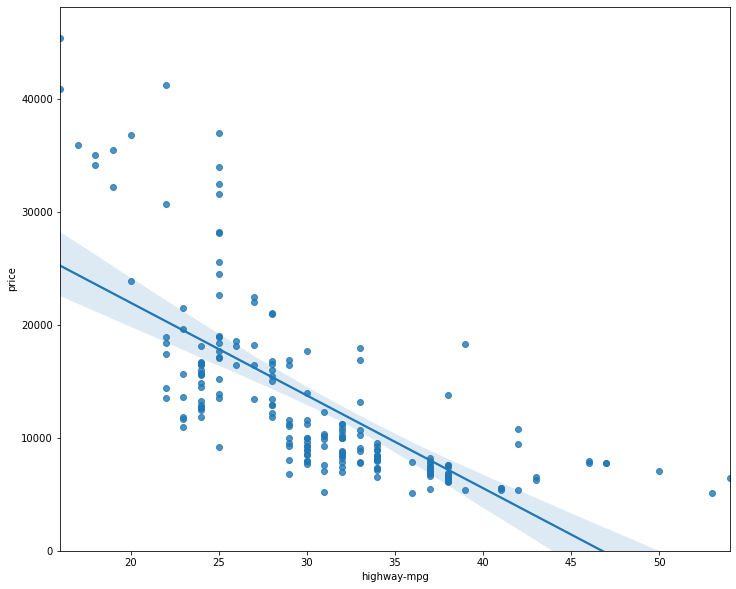

In [17]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

The data is too far off the line, this SLM might not be the best model for this data.
Let`s compare this plot to the regression plot of ***peak-rpm***.

(0.0, 47414.1)

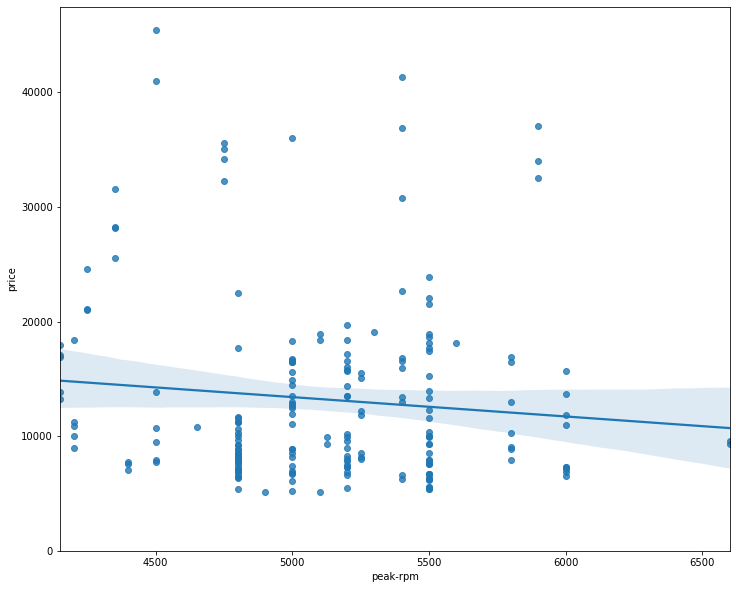

In [18]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>


In [19]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis. Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

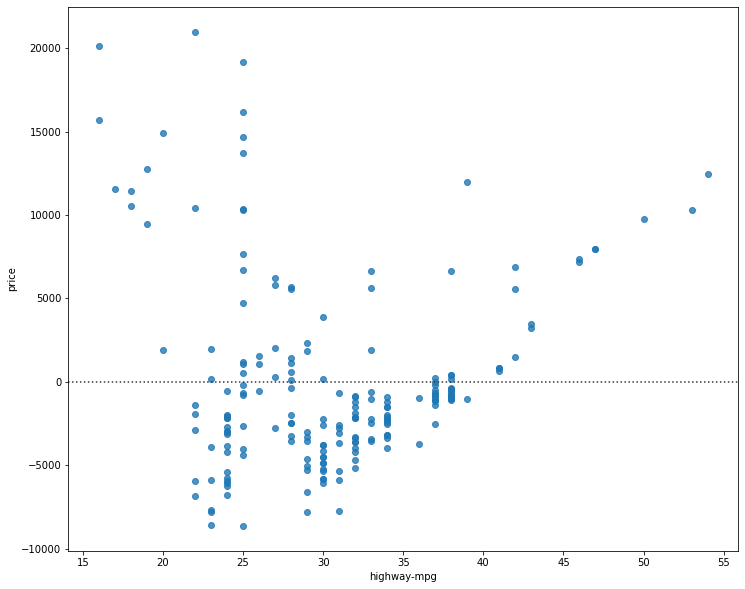

In [21]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

<h3>Polynomial Regression and Pipelines</h3>

Polymonial Regression is a particular case of the general linear regression or multiply linear regression models. We get ***non linear*** relationship by squaring or setting higher-order terms of the predictor variables.

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$



<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


In [22]:
#function for plotting the data

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [24]:
#get the variaables

x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function **polyfit**, then use the function **poly1d** to display the polynomial function.

In [30]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


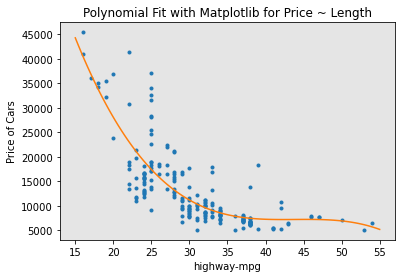

In [31]:
# plot the function

PlotPolly(p, x, y,'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


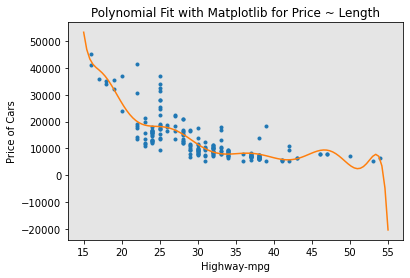

In [35]:
# 11 order function

f11 = np.polyfit(x, y , 11)
p11 = np.poly1d(f11)
print(p11)
PlotPolly(p11, x, y, "Highway-mpg")

<h3>Multivariate Polynomial function</h3>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


In [37]:
#import the module

from sklearn.preprocessing import PolynomialFeatures

In [38]:
# create a PolynomialFeatures object of degree 2

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [39]:
Z_pr=pr.fit_transform(Z)

In [41]:
# The original data is of 201 samples and 4 features
Z.shape

(201, 4)

In [42]:
#after the transformation, there 201 samples and 15 features
Z_pr.shape

(201, 15)

<h3>Pipeline</h3>


Data Pipelines simplify the steps of processing the data. We use the module **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [44]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [45]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can normalize the data,  perform a transform and fit the model simultaneously. 


In [46]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously


In [47]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>Measures for In-Sample Evaluation</h2>

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Linear Regression</h3>

**Let's calculate the R^2**

In [52]:
#highway_mpg_fit
lm.fit(X, y)
# Find the R^2
print('The R-square is: ', lm.score(X, y))

The R-square is:  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit

**Let's calculate the MSE**

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [53]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [54]:
#import the function "mean_squared_error" from the module "metrics"

from sklearn.metrics import mean_squared_error


In [55]:
# compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3>Multiply Linear Regression</h3>

**Let's calculate the R^2**

In [57]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


**Let's calculate the MSE**

In [58]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results 


In [59]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Polynomial Fit</h3>

**Let's calculate the R^2**

Let’s import the function **r2_scor** from the module **metric** as we are using a different function


In [62]:
from sklearn.metrics import r2_score

In [63]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


~ 67.419 % of the variation of price is explained by this polynomial fit


**Let's calculate the MSE**

In [64]:
mean_squared_error(df['price'], p(x))

20474146.42636125

<h3>Prediction and Decision Making</h3>
<h4>Prediction</h4>

We trained the model using the method **fit**. Now we will use the method **predict** to produce a prediction.



In [65]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [66]:
#create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [68]:
#fit the model
lm.fit(X, y)
lm

LinearRegression()

In [70]:
#produce a predict
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

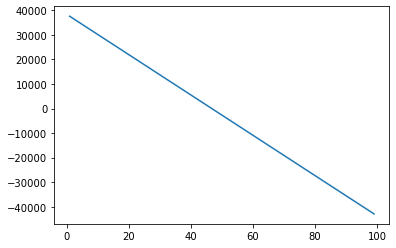

In [71]:
#plot the data
plt.plot(new_input, yhat)
plt.show()

<h4>Decision Making: Determining a Good Model Fit</h4>


<p>
<ul>
     <li><i> How do we determine a good model fit?</i></li>
     <li><i> What is a good R-squared value?</i></li>
     <li><i> What is a good MSE?</i></li>
    
</ul> </p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h4>SLR vs MLR</h4>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b> The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.


<h4>SLR vs Polynomial Fit</h4>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>


<h4>MLR vs Polynomial Fit</h4>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion:</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>
